# TFY4345 Klassisk Mekanikk - Øving 1: Pendel

### Høst 2019

av Thomas Parelius

NTNU Trondheim, 2019-09-29

In [41]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [42]:
#Initalisering og definisjon av startverdier
import math
l = 1.0;
g = 9.81;
m = 1.0;
theta0 = 0.2;
omega0 = 0.0;

#Potensiell energi/starverdi
beta = (math.pi - theta0)/(2.0);
h=2*math.cos(beta)*math.cos(beta);
En0 = m * g * h;

Jeg har valgt å lage en separat funksjon for hver metode i denne oppgaven. Så nedenfor følger det 4 funksjoner som må kjøres (shift-enter) før de kan brukes. Funksjonene tar inn to argumenter, dt og phase. 'dt' er timestepverdien, og 'phase' gir ut phaseplot hvis phase !=0. Hvis phase==0 gir funksjonene et vanlig plot av total energi og vinkel som funksjon av tiden.

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import math

#Denne funksjonen initialiserer arrays og regner ut de analytiske verdiene, 
#og plotter energien og vinkelen som fuksjon av tid.

def analytisk(dt, phase):
    sek = 10.0;
    t = np.arange(0.0, sek+dt, dt);
    N = len(t);
    
    #Initialisering av arrays
    An_omega = np.zeros(N);
    An_omega[0] = omega0;
    An_theta = np.zeros(N);
    An_theta[0] = theta0;
    An_En = np.zeros(N);
    An_En[0] = En0;
    
    #Analytiske utregninger
    for i in range(0, N):
        An_theta[i] = theta0*math.sin(math.sqrt(g/l)*t[i] + (math.pi/2.0));
        An_omega[i] = math.sqrt(g/l)*theta0*math.cos(math.sqrt(g/l)*t[i]+(math.pi/2.0));
        An_En[i] = 0.5*m*l**2.0*(An_omega[i]**2.0 + (g/l)*An_theta[i]**2.0);
    
    #Plot
    plt.figure();
    if phase == 0:
        plt.plot(t, An_theta);
        plt.plot(t, An_En);
        plt.title('Analytiske verdier. Timestep = %1.4f' % dt);
        plt.xlabel('time (s)');
        plt.ylabel('Vinkel (rad), og energi (Joule)')
    else: #Plot av phase space
        plt.plot(An_theta, An_omega);
        plt.title('Analytiske verdier, Phase space. Timestep = %1.4f' % dt);
        plt.xlabel('Vinkel (rad)');
        plt.ylabel('Vinkelhastighet (rad/s)')
    plt.axis('auto');
    plt.grid(True);
    plt.show();
    return;

In [44]:
import numpy as np
import matplotlib.pyplot as plt

#Denne funksjonen initialiserer arrays og regner ut de numeriske verdiene via Eulers metode, 
#og plotter energien og vinkelen som fuksjon av tid.

def euler (dt, phase):
    sek = 10.0;
    t = np.arange(0.0, sek+dt, dt);
    N = len(t);
    
    #Initialisering av arrays
    Eu_omega = np.zeros(N);
    Eu_omega[0] = omega0;
    Eu_theta = np.zeros(N);
    Eu_theta[0] = theta0;
    Eu_En = np.zeros(N);
    Eu_En[0] = En0; 
    
    #Eulers metode
    for i in range(0, N-1):
        Eu_omega[i+1] = Eu_omega[i] - (g/l)*Eu_theta[i]*dt;
        Eu_theta[i+1] = Eu_theta[i] + Eu_omega[i]*dt;
        Eu_En[i+1] = Eu_En[i] + 0.5*m*g*l*dt**2.0*(Eu_omega[i]**2.0 + (g/l)*Eu_theta[i]**2.0);
    
    #Plot
    plt.figure();
    if phase == 0:
        plt.plot(t, Eu_theta);
        plt.plot(t, Eu_En);
        plt.title('Eulers metode. Timestep = %1.4f' % dt);
        plt.xlabel('time (s)');
        plt.ylabel('Vinkel (rad), og energi (Joule)')
    else: #Plot av phase space
        plt.plot(Eu_theta, Eu_omega);
        plt.title('Eulers metode. Phase space. Timestep = %1.4f' % dt);
        plt.xlabel('Vinkel (rad)');
        plt.ylabel('Vinkelhastighet (rad/s)')
    plt.axis('auto');
    plt.grid(True);
    plt.show();
    return;

In [45]:
import numpy as np
import matplotlib.pyplot as plt

#Denne funksjonen initialiserer arrays og regner ut de numeriske verdiene via Euler-Cromers metode, 
#og plotter energien og vinkelen som fuksjon av tid.

def eulerCromer(dt, phase):
    sek = 10.0;
    t = np.arange(0.0, sek+dt, dt);
    N = len(t);
    
    #Initialisering av arrays
    EC_theta = np.zeros(N);
    EC_theta[0] = theta0;
    EC_omega = np.zeros(N);
    EC_omega[0] = omega0;
    EC_En = np.zeros(N);
    EC_En[0] = En0;
    
    #Euler-Cromers metode
    for i in range(0, N-1):        
        EC_omega[i+1] = EC_omega[i] - (g/l)*EC_theta[i]*dt;
        EC_theta[i+1] = EC_theta[i] + EC_omega[i+1]*dt;
        EC_En[i+1] = EC_En[i] + 0.5*m*g*l*dt**2.0*(EC_omega[i]**2.0 + (g/l)*EC_theta[i]**2.0);
    
    #Plot
    plt.figure();
    if phase == 0:
        plt.plot(t, EC_theta);
        plt.plot(t, EC_En);
        plt.title('Euler-Cromers metode. Timestep = %1.4f' % dt);
        plt.xlabel('time (s)');
        plt.ylabel('Vinkel (rad), og energi (Joule)')
    else: #Plot av phase space.
        plt.plot(EC_theta, EC_omega);
        plt.title('Euler-Cromers metode. Phase space. Timestep = %1.4f' % dt);
        plt.xlabel('Vinkel (rad)');
        plt.ylabel('Vinkelhastighet (rad/s)')
    plt.axis('auto');
    plt.grid(True);
    plt.show();
    return;

In [46]:
import numpy as np
import matplotlib.pyplot as plt

#Denne funksjonen initialiserer arrays og regner ut de numeriske verdiene via Runge-Kutta 4 metoden, 
#og plotter energien og vinkelen som fuksjon av tid.

def rk4(dt, phase):
    sek = 10.0;
    t = np.arange(0.0, sek+dt, dt);
    N = len(t);
    
    #Initialisering av arrays
    RK_theta = np.zeros(N);
    RK_theta[0] = theta0;
    RK_omega = np.zeros(N);
    RK_omega[0] = omega0;
    RK_En = np.zeros(N);
    RK_En[0] = En0;
    RK_C = -(g/l);    

    #Runge-Kutta 4
    for i in range(0, N-1):
        theta_k1 = dt*RK_omega[i];
        theta_k2 = dt*(RK_omega[i] + theta_k1/2.0);
        theta_k3 = dt*(RK_omega[i] + theta_k2/2.0);
        theta_k4 = dt*(RK_omega[i] + theta_k3);
        RK_theta[i+1] = RK_theta[i] + (1/6)*(theta_k1 + 2*theta_k2 + 2*theta_k3 + theta_k4);
        
        omega_k1 = dt* RK_theta[i]*RK_C;
        omega_k2 = dt*(RK_theta[i]*RK_C + omega_k1/2.0);
        omega_k3 = dt*(RK_theta[i]*RK_C + omega_k2/2.0);
        omega_k4 = dt*(RK_C*RK_theta[i] + omega_k3);
        RK_omega[i+1] = RK_omega[i]+(1/6)*(omega_k1 + 2*omega_k2 + 2*omega_k3+ omega_k4);
        
        RK_En[i+1] = RK_En[i] + 0.5*m*g*l*dt**2.0*(RK_omega[i]**2.0 + (g/l)*RK_theta[i]**2.0);
    
    #Plot
    plt.figure();
    if phase == 0:
        plt.plot(t, RK_theta);
        plt.plot(t, RK_En);
        plt.title('Runge-Kutta 4. Timestep = %1.4f' % dt);
        plt.xlabel('time (s)');
        plt.ylabel('Vinkel (rad), og energi (Joule)')
    else: #Plot av phase space.
        plt.plot(RK_theta, RK_omega);
        plt.title('Runge-Kutta 4. Phase space. Timestep = %1.4f' % dt);
        plt.xlabel('Vinkel (rad)');
        plt.ylabel('Vinkelhastighet (rad/s)')
    plt.axis('auto');
    plt.grid(True);
    plt.show()
    return;

# Oppgave 1:

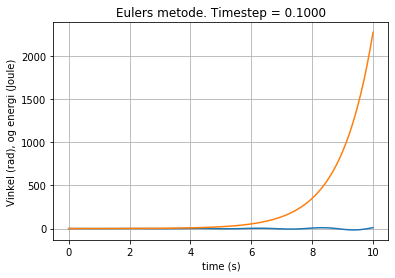

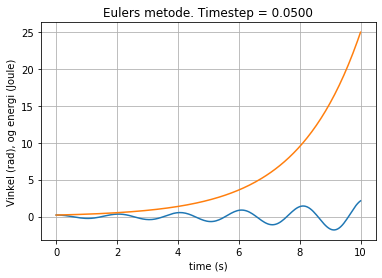

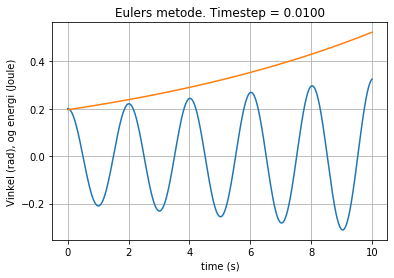

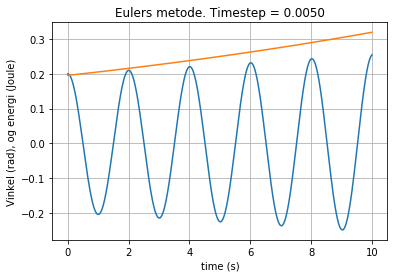

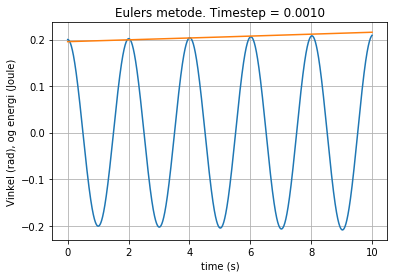

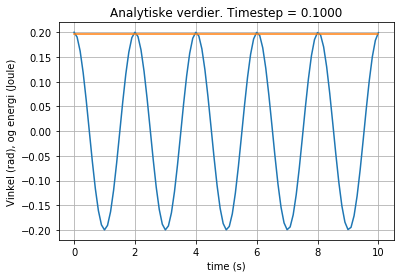

In [47]:
#Plotter ut eulers metode med ulik dt, og den analytiske funksjonen for sammenligning.
euler(0.1,0);
euler(0.05,0);
euler(0.01,0);
euler(0.005,0);
euler(0.001,0);
analytisk(0.1,0);

Ser at med en dt-verdi over 0.001 så vil Eulers metode eksplodere. 

dt = 0.001 er derfor en god verdi for Eulers metode.

Valgte her å bruke plt.axis('auto') siden det viser hvor enormt den totale energien eksploderer med høyt timestep etter flere perioder, og hvor stor effekt et mindre timestep har på Eulers metode.

# Oppgave 2:

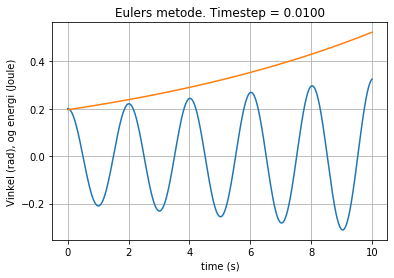

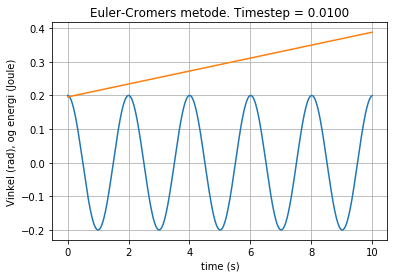

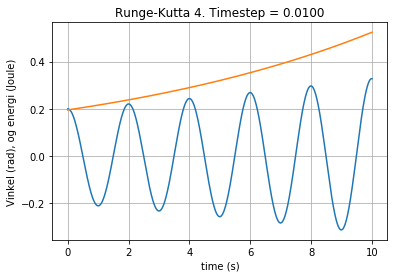

In [48]:
#Plotter Euler, Euler-Cromer, og Runge-Kutta 4 med timestep på 0.01.
euler(0.01,0);
eulerCromer(0.01,0);
rk4(0.01,0);

Valgte et timestep på 0.01 som er ganske høyt, men det får fram hvordan de ulike metodene utvilker seg med tid.

Vi ser at Eulers metode og RK4 har en tendens til å eksplodere raskere enn Euler-Cromers metode. Energien øker eksponentielt, hvor Euler-Cromer har en lineær økning. Med timesteppen jeg valgte ser du at vinkelen til Euler-Cromer holder seg lik den analytiske, mens RK4 og Euler øker for hvert timestep.

# Phase space:

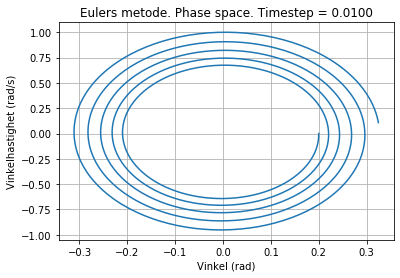

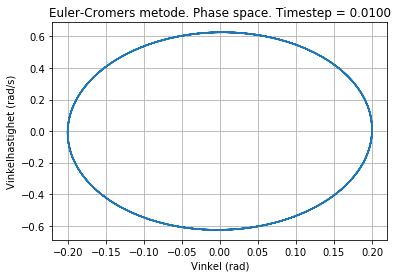

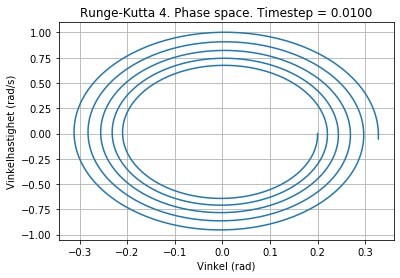

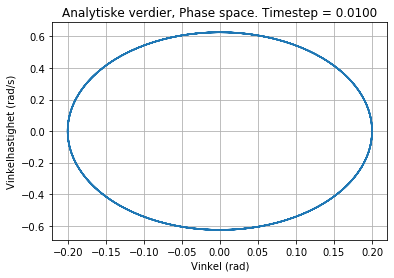

In [50]:
#Plotter her fire faseplot, ett av hver funksjon. Her er vinkelhastigheten omega plottet som en funksjon av vinkelen theta.
#faseplot er aktivert via det andre argumentet i funksjonen.

euler(0.01, 1);
eulerCromer(0.01, 1);
rk4(0.01, 1);
analytisk(0.01, 1);

Her ser vi at pendelen med Eulers metode og Runge-Kutta 4 oscillerer raskere og raskere for hver periode, mens Euler-Cromer holder seg stabil, lik som den analytiske løsningen.

# Varierende timestep:

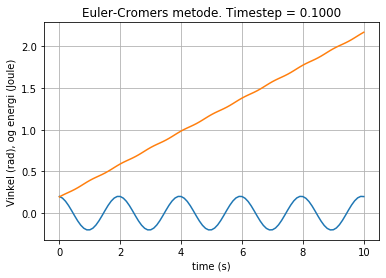

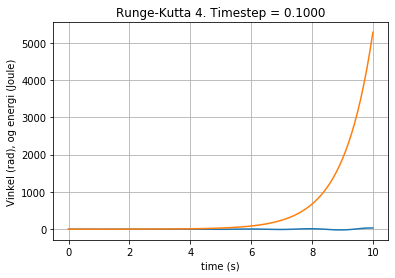

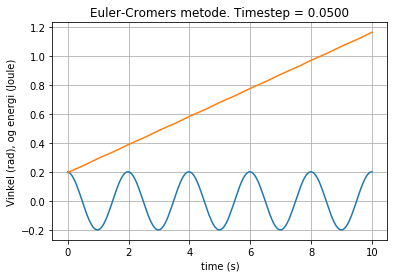

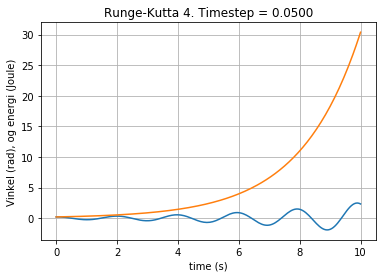

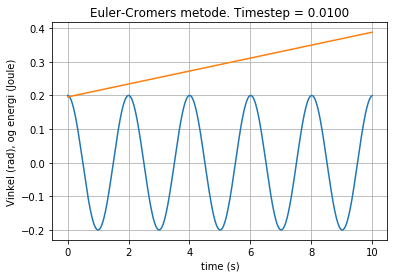

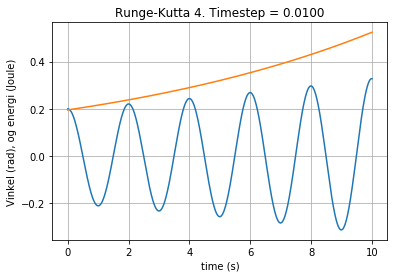

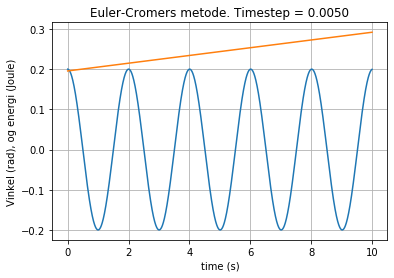

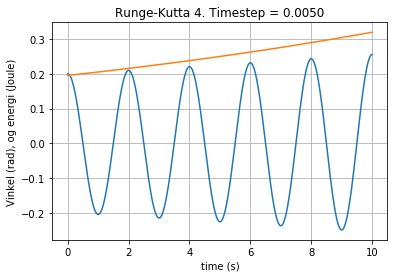

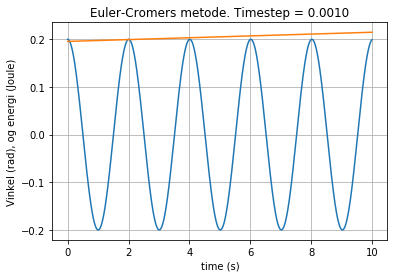

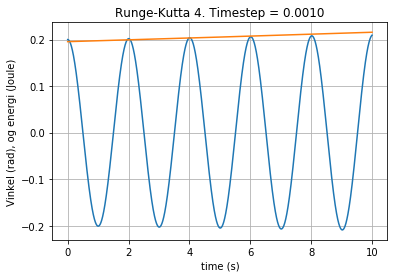

In [51]:
#Her plotter jeg Euler-Cromer og Runge-Kutta 4 med fem ulike timestepverdier, for å observere hvordan de
#oppfører seg og for å finne en timestepverdi som gir ønskelig oppførsel.

eulerCromer(0.1, 0);
rk4(0.1,0);

eulerCromer(0.05, 0);
rk4(0.05,0);

eulerCromer(0.01, 0);
rk4(0.01,0);

eulerCromer(0.005, 0);
rk4(0.005,0);

eulerCromer(0.001, 0);
rk4(0.001,0);

Her ser vi at Euler-Cromers metode gir meget gode resultater for vinkelen selv med høy timestepverdi. Den totale energien derimot viser ustabilitet for timestepverdier over 0.05.

Runge-Kutta 4 viser en høyere tendens til å eksplodere, men gir brukbare resultater med et timestep på 0.05 eller lavere.